<a href="https://colab.research.google.com/github/rushikeshlandge25/car-price-prediction/blob/main/newcar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is the car price prediction model to decide the price of the car

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
df=pd.read_csv("ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [57]:
df['car_age']=2026-df['year']
df.drop('year',axis=1,inplace=True)

<Axes: >

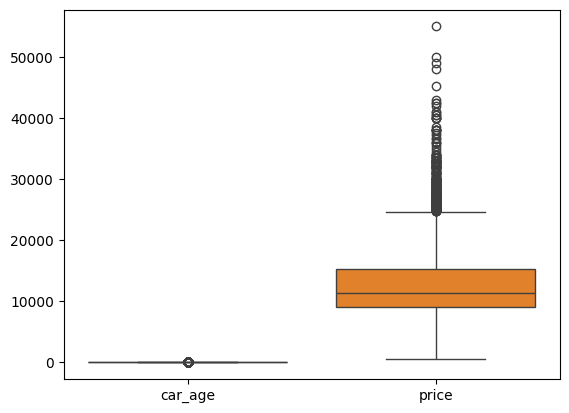

In [58]:

col=df['car_age'],df['price']
sns.boxplot(col)

<Axes: >

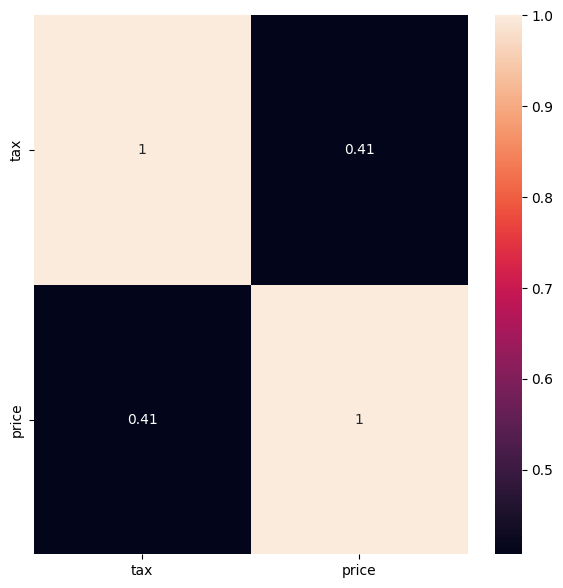

In [59]:
col=df[['tax','price']]
corr=col.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

In [60]:
X=df.drop('price',axis=1)
y=df['price']

In [61]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
num_col=X.select_dtypes(include=np.number).columns
cat_col=X.select_dtypes(exclude=np.number).columns

In [63]:
num_col

Index(['mileage', 'tax', 'mpg', 'engineSize', 'car_age'], dtype='object')

In [64]:
cat_col

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [65]:

pipe=Pipeline([
    ('num',MinMaxScaler()),
    ('cat',OneHotEncoder())
])

In [66]:
col_trans=ColumnTransformer(transformers=[
    ('num',MinMaxScaler(),num_col),
    ('cat',OneHotEncoder(),cat_col)
] ,remainder='passthrough')
model=LinearRegression()

In [67]:
pipe1=Pipeline([
    ('pre',col_trans),
    ('model',model)
])

In [68]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['mileage', 'tax', 'mpg', 'engineSize', 'car_age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['model', 'transmission', 'fuelType'], dtype='object'))])),
                ('model', LinearRegression())])

In [69]:
y_pred=pipe1.predict(X_test)
y_pred

array([ 6644.59180026,  9190.9443044 ,  9815.66081393, ...,
       30065.02792883,  9629.27253587, 15117.01036711])

In [70]:
r2=r2_score(y_test,y_pred)
print("r2 score is ",100*r2)

r2 score is  84.5842313693687
